<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/m7NLP/d4/notes/NLPDLAIW2sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os 
from tensorflow import keras
import zipfile
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
import os
from datetime import datetime
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# os.environ["KAGGLE_CONFIG_DIR"] = ("/content")
# !kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

In [2]:
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v #sarcasmdata

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 88.2MB/s]


In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type= 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [4]:
import json
with open('sarcasm.json', 'r') as f:
  datastore = json.load(f)


sentences = []
labels = []
urls  = []


for item in datastore:

  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [13]:

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [14]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen= max_length, truncating=trunc_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen= max_length,truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')

])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model.summary()

In [10]:
import numpy as np

In [ ]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)
testing_labels

array([1, 0, 0, ..., 0, 0, 0])

time: 9.32 ms (started: 2021-11-01 05:47:42 +00:00)


In [17]:
num_epochs = 30
history = model.fit(padded,
          training_labels,
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels),
          verbose=2
)

Epoch 1/30
625/625 - 3s - loss: 0.5619 - accuracy: 0.7002 - val_loss: 0.4021 - val_accuracy: 0.8237
Epoch 2/30
625/625 - 2s - loss: 0.3096 - accuracy: 0.8740 - val_loss: 0.3526 - val_accuracy: 0.8405
Epoch 3/30
625/625 - 2s - loss: 0.2308 - accuracy: 0.9076 - val_loss: 0.3434 - val_accuracy: 0.8551
Epoch 4/30
625/625 - 2s - loss: 0.1854 - accuracy: 0.9295 - val_loss: 0.3647 - val_accuracy: 0.8533
Epoch 5/30
625/625 - 2s - loss: 0.1534 - accuracy: 0.9436 - val_loss: 0.4032 - val_accuracy: 0.8501
Epoch 6/30
625/625 - 2s - loss: 0.1304 - accuracy: 0.9546 - val_loss: 0.4337 - val_accuracy: 0.8438
Epoch 7/30
625/625 - 2s - loss: 0.1116 - accuracy: 0.9606 - val_loss: 0.4670 - val_accuracy: 0.8422
Epoch 8/30
625/625 - 2s - loss: 0.0946 - accuracy: 0.9689 - val_loss: 0.5099 - val_accuracy: 0.8384
Epoch 9/30
625/625 - 2s - loss: 0.0825 - accuracy: 0.9732 - val_loss: 0.5560 - val_accuracy: 0.8337
Epoch 10/30
625/625 - 2s - loss: 0.0720 - accuracy: 0.9761 - val_loss: 0.6009 - val_accuracy: 0.8319

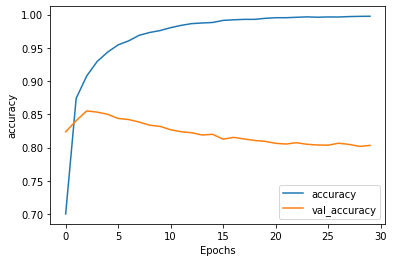

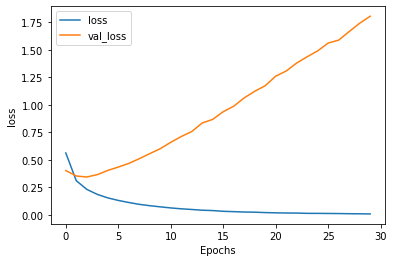

In [27]:
import matplotlib.pyplot as plt

def plot_g(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()


plot_g(history,"accuracy")
plot_g(history,'loss')